In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Set plot style
#sns.set_style("whitegrid")

In [2]:
# Create a list
main_list = [1, 5, 5, 10, 11, 11, 14, 16, 17, 17, 18, 20, 21, 22, 22, 24, 25, 
     25, 27, 28, 29, 30, 31, 31, 32, 33, 33, 35, 38, 40, 41, 41, 45, 47, 49, 51]

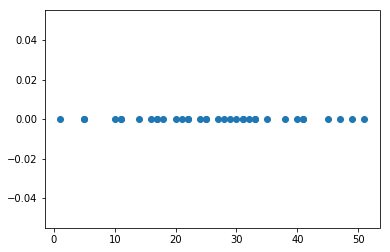

In [3]:
# Create 1-D scatter plot of list a
plt.plot(main_list, np.zeros_like(main_list), 'o')
plt.show()

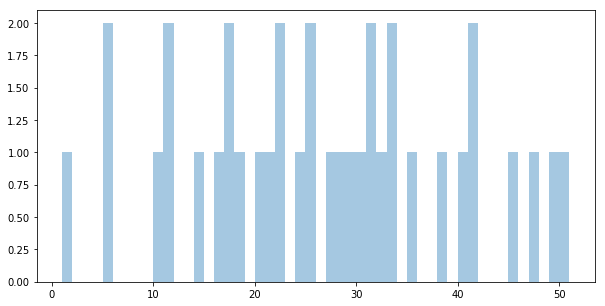

In [4]:
# Create histogram
plt.figure(figsize = (10, 5))
sns.distplot(main_list, kde = False, bins = 50)
plt.show()

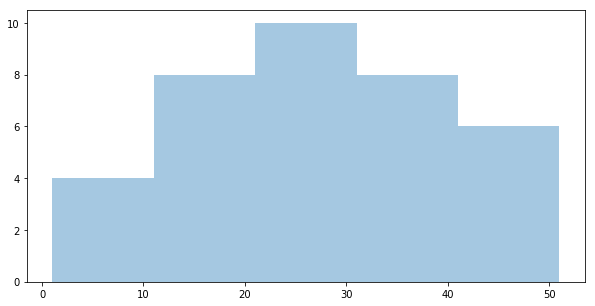

In [5]:
# Create histogram of elements in main list with 5 bins
plt.figure(figsize = (10, 5))
sns.distplot(main_list, bins = 5, kde = False)
plt.show()

In [6]:
# Use np.historam to compute bin edges and element counts per each bin
counts,bins = np.histogram(main_list, bins=5)
print("bin edges :",bins)
print("element counts per each bin :",counts)

bin edges : [ 1. 11. 21. 31. 41. 51.]
element counts per each bin : [ 4  8 10  8  6]


In [7]:
count, bins = np.histogram(main_list, bins=5, density=True)
print("bin edges :",bins)
print("counts per each bin using density=True:",count)

bin edges : [ 1. 11. 21. 31. 41. 51.]
counts per each bin using density=True: [0.01111111 0.02222222 0.02777778 0.02222222 0.01666667]


In [8]:
# n is the number of elements in each bin
n = counts

# db is the difference between bin edges
db = np.array(np.diff(bins))

print("Manual calculated densities for each bin", n/db/n.sum())

Manual calculated densities for each bin [0.01111111 0.02222222 0.02777778 0.02222222 0.01666667]


In [9]:
print(counts/sum(counts))

[0.11111111 0.22222222 0.27777778 0.22222222 0.16666667]


Densities for each bin [0.11111111 0.22222222 0.27777778 0.22222222 0.16666667]
Bin edges [ 1. 11. 21. 31. 41. 51.]


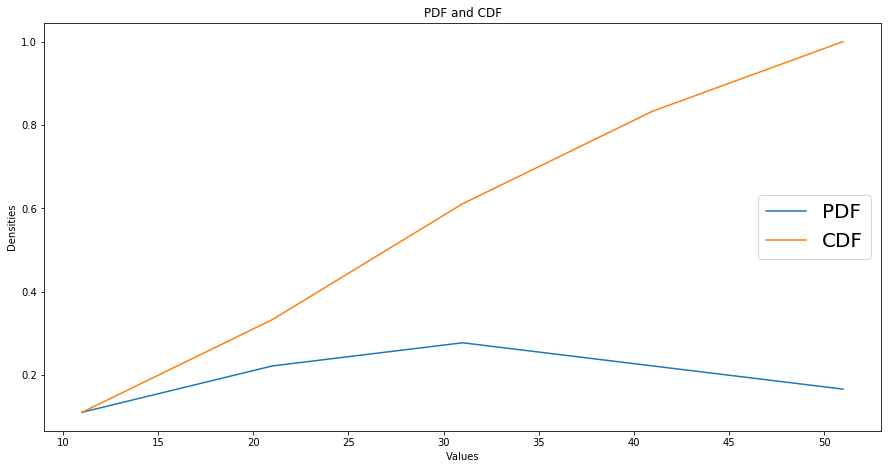

In [10]:
# Plot PDF (Probability Density Function
counts, bin_edges = np.histogram(main_list, bins=5, density = True)
pdf = counts/(sum(counts))
print("Densities for each bin", pdf);
print("Bin edges", bin_edges);
cdf = np.cumsum(pdf)

plt.figure(figsize=(15, 7.5))
#sns.set_style('whitegrid')
plt.title('PDF and CDF')
plt.ylabel('Densities')
plt.xlabel('Values')
plt.plot(bin_edges[1:],pdf, label = 'PDF');
plt.plot(bin_edges[1:], cdf, label = 'CDF')
plt.legend(loc = 5, prop = {'size':20})

plt.show()

In [11]:
# Assign the copy of list a into b variable
copy_list = main_list.copy()

# Create a dataframe based on the list values
copy_df = pd.DataFrame(copy_list)

# Normalise dataframe values using Scikit-learn library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
copy_df = sc.fit_transform(copy_df)

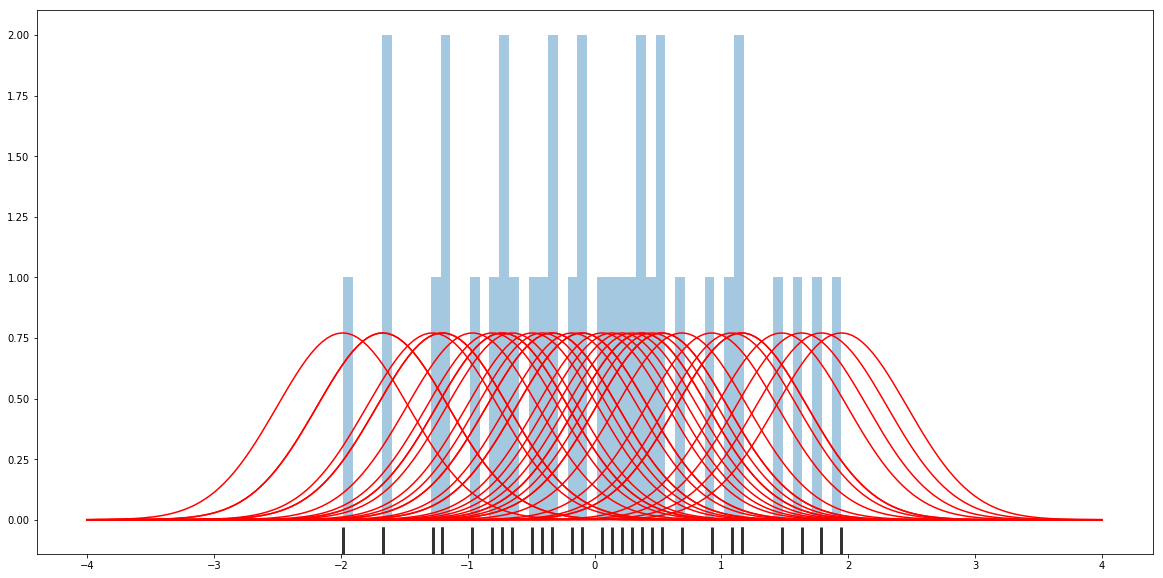

In [12]:
from scipy import stats
plt.figure(figsize=(20,10))

#set the bandwidth for the KDE points
bandwidth = 1.06 * copy_df.std() * copy_df.size ** (-1 / 5.)

#set the limits of the y axis
support = np.linspace(-4, 4, 200)

#iterate through the data points and create kernels for each and #then plot
#the kernels
kernels = []
for i in copy_df:
    kernel = stats.norm(i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")
sns.rugplot(copy_df, color=".2", linewidth=3)

sns.distplot(copy_df, bins = 51, kde = False)

plt.show()

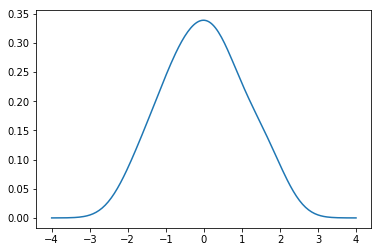

In [13]:
#Integrate along the given axis using the composite trapezoidal rule and create the KDE plot
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density)

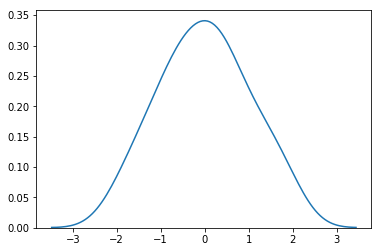

In [14]:
sns.distplot(copy_df, kde = True, hist = False)

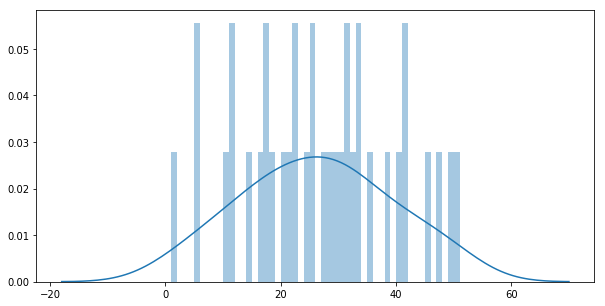

In [15]:
# Create histogram of elements in list a with 50 bins
plt.figure(figsize = (10, 5))
sns.distplot(main_list, kde = True, hist= True, bins = 50)
plt.show()

In [16]:
# Mean
print(np.mean(main_list))

26.25


In [17]:
# Std-deviation
print(np.std(main_list))

12.71563997602952


In [18]:
# Median
print(np.median(main_list))

26.0


In [19]:
X1 = [1,2,3,4,5,6,7]            # Without outlier
X2 = [1,2,3,4,5,6,7,1000]       # With outlier
print('Mean value of X1 is', np.mean(X1))
print('Median value of X1 is', np.median(X1))
print('*'*50)
print('Mean Value of X2 is:', np.mean(X2))
print('Median value of of X2 is', np.median(X2))

Mean value of X1 is 4.0
Median value of X1 is 4.0
**************************************************
Mean Value of X2 is: 128.5
Median value of of X2 is 4.5


In [20]:
# Quantiles
print(np.percentile(main_list, np.arange(0, 101, 25)))

[ 1.  17.  26.  33.5 51. ]


In [21]:
# 90% percentile
print(np.percentile(main_list, 90))

43.0


In [22]:
# Median Absolute Deviation
from statsmodels import robust
print(robust.mad(main_list))

13.343419966550417


In [23]:
X1 = [1,2,3,4,5,6,7,8]              # Without outlier
X2 = [1,2,3,4,5,6,7,8,1000]         # With outlier
print('Std-dev of X1 is', np.std(X1))
print('MAD of X1 is', robust.mad(X1))
print("*"*50)
print('Std-dev of X2 is', np.std(X2))
print('MAD of X2 is', robust.mad(X2))

Std-dev of X1 is 2.29128784747792
MAD of X1 is 2.965204437011204
**************************************************
Std-dev of X2 is 312.8629250591115
MAD of X2 is 2.965204437011204


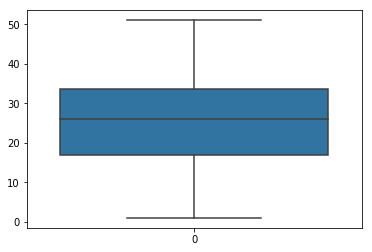

In [24]:
# Create a Box-plot with whiskers
sns.boxplot(data = main_list)

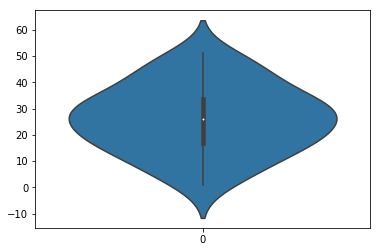

In [25]:
# Create a Violin plot
sns.violinplot(data=main_list, size=8)